# Evolutionary Computation (CS5048)

Edgar Covantes Osuna, PhD

Email: edgar.covantes@tex.mx

Student name: **Miguel Lara **

ID: 

$
\def\zdtone{{\rm ZDT1}}
\def\zdttwo{{\rm ZDT2}}
\def\zdtthree{{\rm ZDT3}}
\def\fon{{\rm FON}}
$

## Multi-objective Optimisation

From the Lecture "Multimodal and Multi-objective Optimisation" you learned the theoretical foundations of Multi-objective Optimisation as a small set of optimisation and black box optimisation problems.

You know are familiar with the terms multi-objective function, decision space, objective space, Pareto set, Pareto front, decision vector and objective vector and dominance relations. 

You are now familiar with the difference between single-objective and multi-objective optimisation and the problem that all Multi-Objective Evolutionary Algorithms (MOEAs) have to overcome when solving multi-objective problems:
1. Push the population close to the Pareto front.
2. Spread the population along the front such that is well covered. 

And finally, we just mentioned some well-known MOEAs.

## Instructions

In this activity you will need to make a literature review of the well-known MOEAs mentioned during the lecture to tackle 4 multi-objective optimisation problem (all of them are defined as minimisation problems). 

You can use any MOEA you want but you can not use any framework available on the internet. This is, you will need to design and program your solution from scratch using just Python and on Google Colab.

It is expected from you to read the literature so you can solve these problems. By knowing the problem it will be easier for you to make decisions about parameter settings, mechanisms to apply, the search space to use and the structure of the inviduals to use.

**The goal**:

At the end of the execution of your MOEAs you should present a population containing all Pareto-optimal decision vector $X^*$ (Pareto set) and in consecuence all $F^*$, the set of all Pareto-optimal objective vectors (Pareto front).

**Marking scheme**:

For each function, the final population will be used to estimate the percentage of the Pareto front covered.

- $\zdtone$ has a convex Pareto-optimal front (25 points). 
- $\zdttwo$ is the nonconvex counterpart to $\zdtone$ (25 points).
- $\zdtthree$ represents the discreteness feature; its Pareto-optimal front consists of several noncontiguous convex parts (25 points).
- $\fon$ has a similar shape as $\zdttwo$ (25 points).

**Suggestions**
- Read carefully each section and spend time understanding each function. Each function may require specific representations or operator. I highly suggest reading the slides and the papers referenced there before solving the functions.

## Imports

You can add all the necessary packages in the following cell.

In [12]:
# IF YOU WANT YOU CAN USE THIS CELL TO ADD YOUR IMPORTS.
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
import pandas as pd

#Uncomment the next line incase the latex fonts are not installed in your system (the instalation may take a couple of minutes).
!apt install texlive-fonts-recommended texlive-fonts-extra cm-super dvipng

plt.rc('text', usetex=True)  
plt.rc('font', family='serif')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  cm-super-minimal fonts-adf-accanthis fonts-adf-berenis fonts-adf-gillius
  fonts-adf-universalis fonts-cabin fonts-comfortaa fonts-croscore
  fonts-crosextra-caladea fonts-crosextra-carlito fonts-dejavu-core
  fonts-dejavu-extra fonts-droid-fallback fonts-ebgaramond
  fonts-ebgaramond-extra fonts-font-awesome fonts-freefont-otf
  fonts-freefont-ttf fonts-gfs-artemisia fonts-gfs-complutum fonts-gfs-didot
  fonts-gfs-neohellenic fonts-gfs-olga fonts-gfs-solomos fonts-go
  fonts-junicode fonts-lato fonts-linuxlibertine fonts-lmodern fonts-lobster
  fonts-lobstertwo fonts-noto-hinted fonts-noto-mono fonts-oflb-asana-math
  fonts-open-sans fonts-roboto-hinted fonts-sil-gentium
  fonts-sil-gentium-basic fonts-sil-gentiumplus fonts-sil-gentiumplus-compact
  fonts-stix fonts-texgyre ghostscript gsfonts javascript-common
  libcupsfilters1 libcups

## $\zdtone$

Here is the formal definition of the $\zdtone$ function.

**Definition ($\zdtone$)**: A bi-objective test function with a convex Pareto-optimal front. The function is defined as
\begin{align*}
\zdtone(x) &= (f_1(x),f_2(x)), \\
f_1(x) &= x_1,\\
f_2(x) &= g(x)\cdot\left(1-\sqrt{\frac{x_1}{g(x)}}\right),\\
g(x) &= 1+\frac{9}{n-1}\sum_{i=2}^{n}x_i,
\end{align*}
with $0\leq x_i\leq 1$, for $1\leq i \leq n$.

### Function Definition

Here is the definition of the $\zdtone$ function.

In [185]:
def ZDT1(x):
  f1 = x[0]
  g = 1 + (9 / (len(x)-1)) * sum(x[1:])
  f2 = g * (1 - np.sqrt(x[0]/g))
  return [f1, f2]

By replacing `f2` from the previously defined $\zdtone$ function with $f_2=1-\sqrt{x_1}$ you can obtain values from the Pareto-optimal objective vectors. In the following cell you can generate Pareto-optimal objective vectors and print them using a pandas' Dataframe. 

In [3]:
pareto_front = np.empty((0, 2))

# Feel free to play with the parameter "num" so you can see the shape of the Pareto front.
for f1 in np.linspace(0, 1, num=100):
    f2 = 1 - np.sqrt(f1)
    pareto_front = np.vstack([pareto_front, [f1, f2]])  

# Convert to DataFrame and show its content
pareto_front = pd.DataFrame(pareto_front, columns=['f1', 'f2'])  
pareto_front

,f1,f2
0,0.000000,1.000000
1,0.010101,0.899496
2,0.020202,0.857866
3,0.030303,0.825922
4,0.040404,0.798992
...,...,...
95,0.959596,0.020410
96,0.969697,0.015268
97,0.979798,0.010153
98,0.989899,0.005063


In the following cell you can plot the points from the previously generated dataset so you can visualise the shape of the Pareto-optimal ovjective vectors.

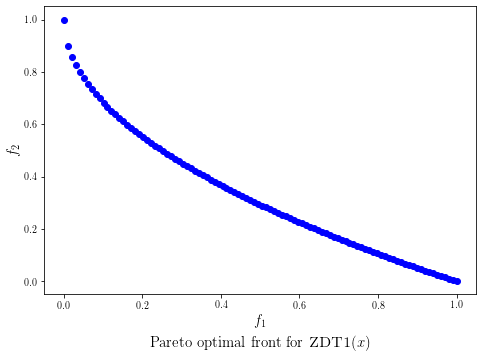

In [ ]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(pareto_front.f1, pareto_front.f2, color='b')
ax.set_xlabel(r'$f_1$', size=15)
ax.set_ylabel(r'$f_2$', size=15)
ax.set_title(r'Pareto optimal front for $\textsc{ZDT1}(x)$', size=15, y=-0.2)
plt.show()

You can also read the Pareto-optimal vectors from the file provided in Canvas, stored them in a pandas' dataframe and print its content.  

In [ ]:
# Before you run the code remember to specify a correct file path
pareto_front = pd.read_csv('ZDT1.pf', delim_whitespace=True)
pareto_front.columns = ['f1','f2']
  
pareto_front

,f1,f2
0,0.001,0.968377
1,0.002,0.955279
2,0.003,0.945228
3,0.004,0.936754
4,0.005,0.929289
...,...,...
995,0.996,0.002002
996,0.997,0.001501
997,0.998,0.001001
998,0.999,0.000500


And again plot the Pareto-optimal objective vectors by running the following cell. As a sanity check, try running but options, automatically generated Pareto-optimal objective vectors and the ones in the file to corroborate that both shapes are the same.

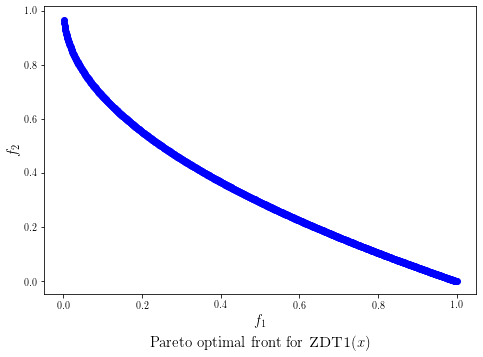

In [ ]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(pareto_front.f1, pareto_front.f2, color='b')
ax.set_xlabel(r'$f_1$', size=15)
ax.set_ylabel(r'$f_2$', size=15)
ax.set_title(r'Pareto optimal front for $\textsc{ZDT1}(x)$', size=15, y=-0.2)
plt.show()

### Parameters to use
In the following section define the value of the parameters that your evolutionary strategy will use. I have added some examples of such parameters but depending on your solution you may want to add some more.

Do not change the parameter values

```
# number_runs = 50
# number_generations = 50000
```
Use these parameters to define the stopping criterion, you can use it as the maximum number of generations allowed for the algorithm to run or the maximum number of fitness evaluations allowed for the algorithm to run.

That time is enough to find an acceptable approximation of the Pareto front of the $\zdtone$. This is to avoid extreme definition of stopping criterions, I do not want to run the algorithm from millions of generations.

Also, if you want to use another stopping criterion together with the number of generations you can do it. If your algorithm was able to find all Pareto-optimal objective vectors before all the time budget is used go ahead and stop the run.


In [293]:
# YOU CAN CHANGE THE VALUES OF THE FOLLOWING PARAMETERS AND ADD ANY OTHER PARAMETER NEEDED IN YOUR SOLUTION
population_size = 150
offspring_size = 0 # not used
mutation_prob = 0.1
crossover_prob = 0
problem_size =  2 # not used, fixed to 2.
lEta = 13
lowLim = 0
upLim = 1
tournamentSize = 2

# DO NOT CHANGE THE VALUE OF THE LINE BELOW.
number_runs = 50
number_generations = 50000 # you can use this one as fitness function evaluations if you want


### Evolution Strategy for $\zdtone$
**The multiobjective problem ZDT1 is solved with the algorithm, NSGA II, explained by Deb, K. et al. [1]. The pseudo code presented in the paper in some parts it is not very clear therefore it was necessary to understand deeply the algorithm by reading the description to be able to propose a concrete solution for real coding. This is the reason the approach to implement the algorithm uses python objects which help to the storage of information for each individual. Having said that, the code is structured as follows:**
1. The individuals are objects with attributes. The attributes are id, rank, m, n, distance, sp, and value. And for the initialization a list of this objects is created with random values within the range specified for the problem.
2. The individuals are selected with tournament selection to be used for crossover, and later all the individuals are mutated.
3. The parents and offsprings are concatenated to be used for the survival method.
4. This is where the NSGA-II is used. It starts with the evaluation of the individual with the objectives functions. Then the rest of the attributes are reset to their original values. Later the fast-non-dominated-front algorthm is applied to the entire population. Next, the new population is filled based on the rank of the frontiers and the assigment of crowdwing distance is calculated as well. If the new population is not completely filled then the crowding distance is used. In this case it first performs a sort based on distance and finally the best individuals are used to complete the new population. 
5. The steps above are repeated until the numbers of runs is completed.


Note: the representation of this problem is with real numbers.

#### Initialisation
**The following code is used to create the population. The first lines of code is the class "individual" which stores all the attributes of each individual and the functions inside the class are used to update the attributes. The last function creates a list with the individuals objects. The values of the individuals depend on the problem to be solved.**

In [187]:
import random
import numpy as np

#Creates the initial population
class individual:
  def __init__(self,i):
    self.value = [random.uniform(0,1),random.uniform(0,1)]
    self.sp = []
    self.rank = 0
    self.id = i
    self.n = 0
    self.m = []
    self.distance = 0

  def add(self, x):
      self.sp.append(x)

  def sumn(self):
      self.n += 1

  def subn(self):
      self.n -= 1

#only two values per individual
def newpop(populationSize): 
  population = [None] * populationSize

  for i in range(populationSize): 
    population[i] = individual(i)
  return population

#### Stopping Criterion
**The stop criterion used for this code is based on the number of allowed runs.**

#### Selection for Reproduction
**The function below is tournament selection, it selects the best individual based on the number of individuals to be compared, this number is defined by "tournament size". The individuals to be compared are selected randomly. It also uses the function "crowded_comparison_operator", which helps to determine the best individual.**

In [188]:
#Tournament Selection
# Implements the tournament selection.
def select(population, tournamentSize):
  winner = np.random.randint(0, len(population))
  #print("first",population[winner].rank,population[winner].distance )
  for i in range(tournamentSize - 1):
    rival = np.random.randint(0, len(population))
    if (crowded_comparison_operator(population[rival],population[winner])):
      winner = rival
  #print("rival",population[rival].rank,population[rival].distance )
  return population[winner]

#### Variation
**The code below are the functions for crossover and mutation. Both are used in the NSGA-II [1]. However, the methods are explained in [2]. This type of variation is used for real representation. The relevant parameters are cRate and mRate which is the threshold for them to be used. The other important parameter is lEta (lower case eta) which is used to specify the amount of variation.**

In [189]:
#Crossover**
import copy
import random

def sbx(parent1, parent2, lEta, cRate):
  offspringA = copy.deepcopy(parent1)
  offspringB = copy.deepcopy(parent2)

  if random.random() <= cRate:
    for i, (v1, v2) in enumerate(zip(offspringA.value, offspringB.value)):
        rand = random.random()
        if rand <= 0.5:
            beta = 2. * rand
        else:
            beta = 1. / (2. * (1. - rand))
        beta **= 1. / (lEta + 1.)
        offspringA.value[i] = 0.5 * (((1 + beta) * v1) + ((1 - beta) * v2))
        offspringB.value[i] = 0.5 * (((1 - beta) * v1) + ((1 + beta) * v2))

  return offspringA, offspringB

#Mutation**
def polyMutation(ind, lowLim, uppLim, lEta, mRate):
  parent = copy.deepcopy(ind)
  for i in range(len(parent.value)):
    if (random.random() <= mRate):
      u = random.random()
      delta = min((parent.value[i] - lowLim), (uppLim - parent.value[i])) / (uppLim - lowLim)
      
      if u <= 0.5:
        deltaQ = (2*u + (1-2*u)*(1-delta)**(lEta + 1))**(1/(lEta + 1))-1
      else:
        deltaQ = 1-(1*(1-u)+2*(u-0.5)*(1-delta)**(lEta+1))**(1/(lEta+1))

      parent.value[i] = parent.value[i] + deltaQ*(uppLim - lowLim)

  return parent

#### Selection for Survival

**The following cells are the core of the NSGA-II:**

+ *dominates*: this function compares individuals based on the definiton of frontiers. This is used by the fast_non_dominated_sort function.
+ *fast_non_dominated_sort*: this used to assign frontier to each of the individuals in the population. 
+ *crowding_distance_assignment*: this function assigns distance between neighbors within the same frontier.
+ *crowded_comparison_operator*: this is used to compare individuals once the distance attribute is filled. The idea is to compare the population of a frontier based on their distance.
+ *nsgaII_step*: This is where all the small chunks of code are put together in order to have the NSGA-II working. 

In [190]:
#Dominates
def dominates(a,b):
  if (a[0] <= b[0]) & (a[1] <= b[1]):
    dominator = True
  else:
    dominator = False
  return dominator

In [191]:
def fast_non_dominated_sort(pop):
  P = pop.copy()

  #Fast-non-dominated-sort(P)
  F = [] 
  f1 = [] 

  for i in range(len(P)):
    Q = P.copy()
    Q.pop(i)
    for j in range(len(Q)):
      if dominates(P[i].m,Q[j].m):#should be m
        P[i].add(Q[j].id)#add to sp
      elif dominates(Q[j].m,P[i].m):#should be m
        P[i].sumn() #sum 1 to the n counter
    if P[i].n == 0:
      P[i].rank = 1
      f1.append(P[i])

  F.append(f1) 
  i = 0
  while (len(F[i]) != 0):
    Q = []
    for p in F[i]:
      for q in p.sp:
        #encuentra el n de la q -> apuntador del id en pop
        P[q].subn()
        if P[q].n == 0:
          P[q].rank = i+2
          Q.append(P[q])
    i += 1
    F.append(Q)

  return F

In [192]:
#Crowding distance assignment (debe de ser por frontera)
#F tiene las fronteras
def crowding_distance_assignment(pop):
  P = pop.copy()

  l = len(P)
  for elem in P:
    elem.distance = 0

  #solo 2 objective functions 
  fmax = [1,6.84]
  fmin = [0,1]

  for i in range(2): #suma a la distancia las diferencias de los 2 objetivos con respecto a sus vecinos
    #print("m: ", i)
    newP = sorted(P, key=lambda x: x.m[i], reverse=False)
    newP[0].distance = float('inf')
    newP[-1].distance = float('inf')
    for j in range(1,l-1,1):
      newP[j].distance = newP[j].distance + (newP[j+1].m[i] - newP[j-1].m[i])/(fmax[i]-fmin[i])
  
  return newP

In [193]:
def crowded_comparison_operator(ind1, ind2):
  if ((ind1.rank < ind2.rank) or ((ind1.rank == ind2.rank) and (ind1.distance > ind2.distance))):
    return True
  else:
    return False

In [194]:
def nsgaII_step(old_pop,eta,cRate,lowLim,upLim,mRate,tournamentSize,fitfunction):
  #Crossover
  Q = []
  for i in range(0,len(old_pop),2):
    parent1 = select(old_pop, tournamentSize)#old_pop[i]
    parent2 = select(old_pop, tournamentSize)#old_pop[i+1]
    offspring1,offspring2 = sbx(parent1, parent2, eta, cRate)
    Q.extend((offspring1,offspring2))

  #Mutation
  for i in range(len(old_pop)):
    Q[i] = polyMutation(Q[i], lowLim, upLim, eta, mRate)

  #Joining the parents and offsprings
  R = old_pop + Q

  #Calculating the fitness and reseting values for algorithm
  for i in range(len(R)):
    R[i].m = fitfunction(R[i].value)
    R[i].id = i
    R[i].rank = 0
    R[i].n = 0
    R[i].sp = []
    R[i].distance = 0

  #Fast non-nominated sort
  Rf = fast_non_dominated_sort(R)

  Pnew = []
  #print("Pnew inicio", len(Pnew))
  for i in range(len(Rf)): 
    if (len(Pnew)+len(Rf[i]) <= len(old_pop)):
      Pnew = Pnew + crowding_distance_assignment(Rf[i])  #Crowding distance assignment
    else:
      Rc = crowding_distance_assignment(Rf[i])
      break
    
  #Sorting based on rank and distance
  Rs = sorted(Rc, key=lambda x: (x.rank, -x.distance), reverse=False) 
  #print("Pnew before crowding selection", len(Pnew))
  #Last selection
  Pnew = Pnew + Rs[0:len(old_pop)-len(Pnew)]
  #print("Pnew FINAL", len(Pnew))

  return Pnew

#### Main Cycle
In the following cell you should implement the main cycle of your evolutionary strategy, this is, putting together all elements defined previously so you can solve the problem.

Once you run the main cycle, the standard output should looks something like this
```
# <Generation/Fitness Evaluation number> <Decision vector (Genotype)> <Objective vector (Fitness functions values)>
```
Feel free to add extra spaces when needed or use any other format you think will make the output look nicer. But please preserve the order.

The following code is only a for loop that calls the NSGA-II function based on the number of runs allowed. 

In [294]:
#Main
gc = 0 # counter of generations
old_pop = newpop(population_size)

number_runs = 30 # to avoid long time waiting

for i in range(number_runs):
  new_pop = nsgaII_step(old_pop,lEta,crossover_prob,lowLim,upLim,mutation_prob,tournamentSize,ZDT1) 
  old_pop = new_pop
  gc += 1


The code below is used to see how the frontier is created. **It is important to hightlight that not always the code runs the best frontier is found. In most of the cases it is found but the algorithm has a stochastic component that does not allow always to find the frontier. Please, run the code around 5 times in order to see how the algorithms works.**

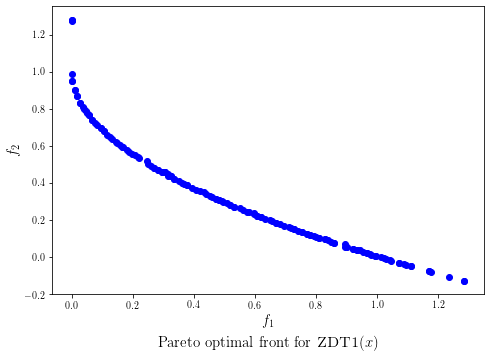

In [295]:
f1 = []
f2 = []
for elem in old_pop:
  f1.append(elem.m[0])
  f2.append(elem.m[1])

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(f1, f2, color='b')
ax.set_xlabel(r'$f_1$', size=15)
ax.set_ylabel(r'$f_2$', size=15)
#plt.ylim([0,1])
#plt.xlim([0,1])
ax.set_title(r'Pareto optimal front for $\textsc{ZDT1}(x)$', size=15, y=-0.2)
plt.show()

The code below is used to print the population found by the algorithm.

In [136]:
for elem in old_pop:
  print("Individual ID: {0}, Rank: {1}, Fitness Value: {2}".format(elem.id, elem.rank, elem.m))

Individual ID: 0, Rank: 1, Fitness Value: [-0.0011118361786847846, nan]
Individual ID: 5, Rank: 1, Fitness Value: [0.002738405387463727, 1.1182801051772953]
Individual ID: 6, Rank: 1, Fitness Value: [-0.0011118361786847846, nan]
Individual ID: 7, Rank: 1, Fitness Value: [-0.0011118361786847846, nan]
Individual ID: 8, Rank: 1, Fitness Value: [-0.0011118361786847846, nan]
Individual ID: 9, Rank: 1, Fitness Value: [-0.0011118361786847846, nan]
Individual ID: 10, Rank: 1, Fitness Value: [-0.0011118361786847846, nan]
Individual ID: 11, Rank: 1, Fitness Value: [-0.0011118361786847846, nan]
Individual ID: 12, Rank: 1, Fitness Value: [-0.0011118361786847846, nan]
Individual ID: 68, Rank: 1, Fitness Value: [0.8116228330547225, 0.10032243287200512]
Individual ID: 14, Rank: 1, Fitness Value: [0.1895983383055353, 0.5667331437092405]
Individual ID: 65, Rank: 1, Fitness Value: [0.6287425100563909, 0.20847451844720957]
Individual ID: 23, Rank: 1, Fitness Value: [0.25537905189567167, 0.498267575700204


## $\zdttwo$

Here is the formal definition of the $\zdttwo$ function.

**Definition ($\zdttwo$)**: A bi-objective test function that is the nonconvex counterpart of $\zdtone$. The function is defined as

\begin{align*}
\zdttwo(x) &= (f_1(x),f_2(x)),\\
f_1(x) &= x_1,\\
f_2(x) &= g(x)\cdot\left(1.0-\left(\frac{x_1}{g(x)}\right)^2\right),\\
g(x) &= 1+\frac{9}{n-1}\sum_{i=2}^{n}x_i,
\end{align*}
with $0\leq x_i\leq 1$, for $1\leq i \leq n$.

### Function Definition

Here is the definition of the $\zdttwo$ function.

In [84]:
def ZDT2(x):
  f1 = x[0]
  g = 1 + ( 9 / (len(x)-1)) * sum(x[1:])
  f2 = g * (1.0 - np.power((x[0]/g),2))
  return [f1, f2]

By replacing `f2` from the previously defined $\zdttwo$ function with $f_2=1-x_1^2$ you can obtain values from the Pareto-optimal objective vectors. In the following cell you can generate Pareto-optimal objective vectors and print them using a pandas' Dataframe. 

In [44]:
pareto_front = np.empty((0, 2))

# Feel free to play with the parameter "num" so you can see the shape of the Pareto front.
for f1 in np.linspace(0, 1, num=100):
    f2 = 1 - np.power(f1, 2)
    pareto_front = np.vstack([pareto_front, [f1, f2]])  

# Convert to DataFrame and show its content
pareto_front = pd.DataFrame(pareto_front, columns=['f1', 'f2'])  
pareto_front

,f1,f2
0,0.000000,1.000000
1,0.010101,0.999898
2,0.020202,0.999592
3,0.030303,0.999082
4,0.040404,0.998368
...,...,...
95,0.959596,0.079176
96,0.969697,0.059688
97,0.979798,0.039996
98,0.989899,0.020100


In the following cell you can plot the points from the previously generated dataset so you can visualise the shape of the Pareto-optimal ovjective vectors.

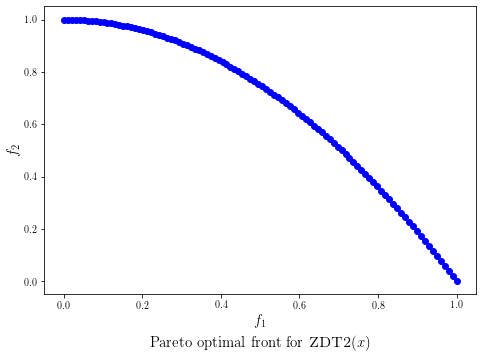

In [ ]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(pareto_front.f1, pareto_front.f2, color='b')
ax.set_xlabel(r'$f_1$', size=15)
ax.set_ylabel(r'$f_2$', size=15)
ax.set_title(r'Pareto optimal front for $\textsc{ZDT2}(x)$', size=15, y=-0.2)
plt.show()

You can also read the Pareto-optimal vectors from the file provided in Canvas, stored them in a pandas' dataframe and print its content.  

In [ ]:
# Before you run the code remember to specify a correct file path
pareto_front = pd.read_csv('/tmp/ZDT2.pf', delim_whitespace=True)
pareto_front.columns = ['f1','f2']
  
pareto_front

And again plot the Pareto-optimal objective vectors by running the following cell. As a sanity check, try running but options, automatically generated Pareto-optimal objective vectors and the ones in the file to corroborate that both shapes are the same.

In [ ]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(pareto_front.f1, pareto_front.f2, color='b')
ax.set_xlabel(r'$f_1$', size=15)
ax.set_ylabel(r'$f_2$', size=15)
ax.set_title(r'Pareto optimal front for $\textsc{ZDT2}(x)$', size=15, y=-0.2)
plt.show()

### Parameters to use
In the following section define the value of the parameters that your evolutionary strategy will use. I have added some examples of such parameters but depending on your solution you may want to add some more.

Do not change the parameter values

```
# number_runs = 50
# number_generations = 50000
```
Use these parameters to define the stopping criterion, you can use it as the maximum number of generations allowed for the algorithm to run or the maximum number of fitness evaluations allowed for the algorithm to run.

That time is enough to find an acceptable approximation of the Pareto front of the $\zdttwo$. This is to avoid extreme definition of stopping criterions, I do not want to run the algorithm from millions of generations.

Also, if you want to use another stopping criterion together with the number of generations you can do it. If your algorithm was able to find all Pareto-optimal objective vectors before all the time budget is used go ahead and stop the run.

In [139]:
# YOU CAN CHANGE THE VALUES OF THE FOLLOWING PARAMETERS AND ADD ANY OTHER PARAMETER NEEDED IN YOUR SOLUTION
population_size = 150
offspring_size = 0 # not used
mutation_prob = 0.1
crossover_prob = 0.0
problem_size =  2 # not used, fixed to 2.
lEta = 10
lowLim = 0
upLim = 1
tournamentSize = 5

# DO NOT CHANGE THE VALUE OF THE LINE BELOW.
number_runs = 50
number_generations = 50000 # you can use this one as fitness function evaluations if you want

### Evolution Strategy for $\zdttwo$
**The multiobjective problem ZDT2 is solved with the algorithm, NSGA II, explained by Deb, K. et al. [1]. The pseudo code presented in the paper in some parts it is not very clear therefore it was necessary to understand deeply the algorithm by reading the description to be able to propose a concrete solution for real coding. This is the reason the approach to implement the algorithm uses python objects which help to the storage of information for each individual. Having said that, the code is structured as follows:**
1. The individuals are objects with attributes. The attributes are id, rank, m, n, distance, sp, and value. And for the initialization a list of this objects is created with random values within the range specified for the problem.
2. The individuals are selected with tournament selection to be used for crossover, and later all the individuals are mutated.
3. The parents and offsprings are concatenated to be used for the survival method.
4. This is where the NSGA-II is used. It starts with the evaluation of the individual with the objectives functions. Then the rest of the attributes are reset to their original values. Later the fast-non-dominated-front algorthm is applied to the entire population. Next, the new population is filled based on the rank of the frontiers and the assigment of crowdwing distance is calculated as well. If the new population is not completely filled then the crowding distance is used. In this case it first performs a sort based on distance and finally the best individuals are used to complete the new population. 
5. The steps above are repeated until the numbers of runs is completed.


Note: the representation of this problem is with real numbers.
 

#### Initialisation
**The following code is used to create the population. The first lines of code is the class "individual" which stores all the attributes of each individual and the functions inside the class are used to update the attributes. The last function creates a list with the individuals objects. The values of the individuals depend on the problem to be solved.**


In [73]:
import random
import numpy as np

#Creates the initial population
class individual:
  def __init__(self,i):
    self.value = [random.uniform(0,1),random.uniform(0,1)]
    self.sp = []
    self.rank = 0
    self.id = i
    self.n = 0
    self.m = []
    self.distance = 0

  def add(self, x):
      self.sp.append(x)

  def sumn(self):
      self.n += 1

  def subn(self):
      self.n -= 1

#only two values per individual
def newpop(populationSize): 
  population = [None] * populationSize

  for i in range(populationSize): 
    population[i] = individual(i)
  return population

#### Stopping Criterion
**Modify the content of this cell to provide a description about your stopping criterion**

#### Selection for Reproduction
**The function below is tournament selection, it selects the best individual based on the number of individuals to be compared, this number is defined by "tournament size". The individuals to be compared are selected randomly. It also uses the function "crowded_comparison_operator", which helps to determine the best individual.**

In [74]:
#Tournament Selection
# Implements the tournament selection.
def select(population, tournamentSize):
  winner = np.random.randint(0, len(population))
  #print("first",population[winner].rank,population[winner].distance )
  for i in range(tournamentSize - 1):
    rival = np.random.randint(0, len(population))
    if (crowded_comparison_operator(population[rival],population[winner])):
      winner = rival
  #print("rival",population[rival].rank,population[rival].distance )
  return population[winner]

#### Variation
**The code below are the functions for crossover and mutation. Both are used in the NSGA-II [1]. However, the methods are explained in [2]. This type of variation is used for real representation. The relevant parameters are cRate and mRate which is the threshold for them to be used. The other important parameter is lEta (lower case eta) which is used to specify the amount of variation.**


In [75]:
#Crossover**
import copy
import random

def sbx(parent1, parent2, lEta, cRate):
  offspringA = copy.deepcopy(parent1)
  offspringB = copy.deepcopy(parent2)

  if random.random() <= cRate:
    for i, (v1, v2) in enumerate(zip(offspringA.value, offspringB.value)):
        rand = random.random()
        if rand <= 0.5:
            beta = 2. * rand
        else:
            beta = 1. / (2. * (1. - rand))
        beta **= 1. / (lEta + 1.)
        offspringA.value[i] = 0.5 * (((1 + beta) * v1) + ((1 - beta) * v2))
        offspringB.value[i] = 0.5 * (((1 - beta) * v1) + ((1 + beta) * v2))

  return offspringA, offspringB

#Mutation**
def polyMutation(ind, lowLim, uppLim, lEta, mRate):
  parent = copy.deepcopy(ind)
  for i in range(len(parent.value)):
    if (random.random() <= mRate):
      u = random.random()
      delta = min((parent.value[i] - lowLim), (uppLim - parent.value[i])) / (uppLim - lowLim)
      
      if u <= 0.5:
        deltaQ = (2*u + (1-2*u)*(1-delta)**(lEta + 1))**(1/(lEta + 1))-1
      else:
        deltaQ = 1-(1*(1-u)+2*(u-0.5)*(1-delta)**(lEta+1))**(1/(lEta+1))

      parent.value[i] = parent.value[i] + deltaQ*(uppLim - lowLim)

  return parent

#### Selection for Survival

**The following cells are the core of the NSGA-II:**

+ *dominates*: this function compares individuals based on the definiton of frontiers. This is used by the fast_non_dominated_sort function.
+ *fast_non_dominated_sort*: this used to assign frontier to each of the individuals in the population. 
+ *crowding_distance_assignment*: this function assigns distance between neighbors within the same frontier.
+ *crowded_comparison_operator*: this is used to compare individuals once the distance attribute is filled. The idea is to compare the population of a frontier based on their distance.
+ *nsgaII_step*: This is where all the small chunks of code are put together in order to have the NSGA-II working. 


In [76]:
#dominates
def dominates(a,b):
  if (a[0] <= b[0]) & (a[1] <= b[1]):
    dominator = True
  else:
    dominator = False
  return dominator

In [77]:
def fast_non_dominated_sort(pop):
  P = pop.copy()

  #Fast-non-dominated-sort(P)
  F = [] # necesario?
  f1 = [] # necesario?

  for i in range(len(P)):
    Q = P.copy()
    Q.pop(i)
    for j in range(len(Q)):
      if dominates(P[i].m,Q[j].m):#should be m
        P[i].add(Q[j].id)#add to sp
      elif dominates(Q[j].m,P[i].m):#should be m
        P[i].sumn() #sum 1 to the n counter
    if P[i].n == 0:
      P[i].rank = 1
      f1.append(P[i])

  F.append(f1) # necesario?
  i = 0
  while (len(F[i]) != 0):
    Q = []
    for p in F[i]:
      for q in p.sp:
        #encuentra el n de la q -> apuntador del id en pop
        P[q].subn()
        if P[q].n == 0:
          P[q].rank = i+2
          Q.append(P[q])
    i += 1
    F.append(Q)# necesario?

  return F

In [89]:
#Crowding distance assignment (debe de ser por frontera)
#F tiene las fronteras
def crowding_distance_assignment(pop):
  P = pop.copy()

  l = len(P)
  for elem in P:
    elem.distance = 0

  #solo 2 objective functions 
  fmax = [1,9.9]
  fmin = [0,0]

  for i in range(2): #suma a la distancia las diferencias de los 2 objetivos con respecto a sus vecinos
    #print("m: ", i)
    newP = sorted(P, key=lambda x: x.m[i], reverse=False)
    newP[0].distance = float('inf')
    newP[-1].distance = float('inf')
    for j in range(1,l-1,1):
      newP[j].distance = newP[j].distance + (newP[j+1].m[i] - newP[j-1].m[i])/(fmax[i]-fmin[i])
  
  return newP

In [79]:
def crowded_comparison_operator(ind1, ind2):
  if ((ind1.rank < ind2.rank) or ((ind1.rank == ind2.rank) and (ind1.distance > ind2.distance))):
    return True
  else:
    return False

In [80]:
def nsgaII_step(old_pop,eta,cRate,lowLim,upLim,mRate,tournamentSize,fitfunction):
  #Crossover
  Q = []
  for i in range(0,len(old_pop),2):
    parent1 = select(old_pop, tournamentSize)#old_pop[i]
    parent2 = select(old_pop, tournamentSize)#old_pop[i+1]
    offspring1,offspring2 = sbx(parent1, parent2, eta, cRate)
    Q.extend((offspring1,offspring2))

  #Mutation
  for i in range(len(old_pop)):
    Q[i] = polyMutation(Q[i], lowLim, upLim, eta, mRate)

  #Joining the parents and offsprings
  R = old_pop + Q

  #Calculating the fitness and reseting values for algorithm
  for i in range(len(R)):
    R[i].m = fitfunction(R[i].value)
    R[i].id = i
    R[i].rank = 0
    R[i].n = 0
    R[i].sp = []
    R[i].distance = 0

  #Fast non-nominated sort
  Rf = fast_non_dominated_sort(R)

  Pnew = []
  #print("Pnew inicio", len(Pnew))
  for i in range(len(Rf)): 
    if (len(Pnew)+len(Rf[i]) <= len(old_pop)):
      Pnew = Pnew + crowding_distance_assignment(Rf[i])  #Crowding distance assignment
    else:
      Rc = crowding_distance_assignment(Rf[i])
      break
    
  #Sorting based on rank and distance
  Rs = sorted(Rc, key=lambda x: (x.rank, -x.distance), reverse=False) 
  #print("Pnew before crowding selection", len(Pnew))
  #Last selection
  Pnew = Pnew + Rs[0:len(old_pop)-len(Pnew)]
  #print("Pnew FINAL", len(Pnew))

  return Pnew

#### Main Cycle
In the following cell you should implement the main cycle of your evolutionary strategy, this is, putting together all elements defined previously so you can solve the problem.

Once you run the main cycle, the standard output should looks something like this
```
# <Generation/Fitness Evaluation number> <Decision vector (Genotype)> <Objective vector (Fitness functions values)>
```
Feel free to add extra spaces when needed or use any other format you think will make the output look nicer. But please preserve the order.

The following code is only a for loop that calls the NSGA-II function based on the number of runs allowed. 


In [144]:
#Main
number_runs = 20
gc = 0 # counter of generations
old_pop = newpop(population_size)

for i in range(number_runs):
  new_pop = nsgaII_step(old_pop,lEta,crossover_prob,lowLim,upLim,mutation_prob,tournamentSize,ZDT2) 
  old_pop = new_pop
  gc += 1


The code below is used to see how the frontier is created. **It is important to hightlight that not always the code runs the best frontier is found. In most of the cases it is found but the algorithm has a stochastic component that does not allow always to find the frontier. Please, run the code around 5 times in order to see how the algorithms works.**

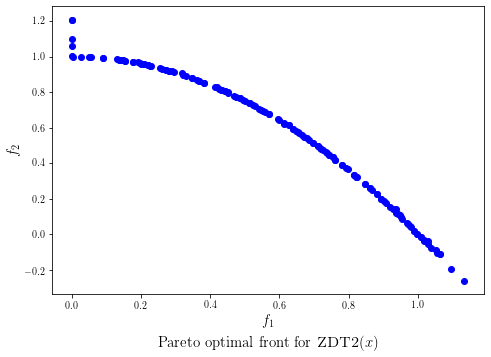

In [145]:
  f1 = []
  f2 = []
  for elem in old_pop:
    f1.append(elem.m[0])
    f2.append(elem.m[1])

  fig=plt.figure()
  ax=fig.add_axes([0,0,1,1])
  ax.scatter(f1, f2, color='b')
  ax.set_xlabel(r'$f_1$', size=15)
  ax.set_ylabel(r'$f_2$', size=15)
  #plt.ylim([0,1])
  ax.set_title(r'Pareto optimal front for $\textsc{ZDT2}(x)$', size=15, y=-0.2)
  plt.show()

The code below is used to print the population found by the algorithm.

In [ ]:
for elem in old_pop:
  print("Individual ID: {0}, Rank: {1}, Fitness Value: {2}".format(elem.id, elem.rank, elem.m))

## $\zdtthree$

Here is the formal definition of the $\zdtthree$ function.

**Definition ($\zdtthree$)**: A bi-objective test function that represents the discretness feature; its Pareto-optimal front consists of several noncontiguous convex parts. The function is defined as

\begin{align*}
\zdtthree(x) &= (f_1(x),f_2(x)),\\
f_1(x) &= x_1,\\
f_2(x) &= g(x)\cdot\left(1.0-\sqrt{\frac{x_1}{g(x)}}-\frac{x_1}{g(x)}\cdot\sin\left(10\pi x_1\right)\right),\\
g(x) &= 1+\frac{9}{n-1}\sum_{i=2}^{n}x_i,
\end{align*}
with $0\leq x_i\leq 1$, for $1\leq i \leq n$.

### Function Definition

In [146]:
def ZDT3(x):
  f1 = x[0]
  g = 1 + ( 9 / (len(x)-1)) * sum(x[1:])
  f2 = g * (1.0 - np.sqrt(x[0]/g) - (x[0]/g) * np.sin(10*np.pi*x[0]))
  return [f1, f2]

By replacing `f2` from the previously defined $\zdtthree$ function with $f_2=1-\sqrt{x_1}-x_1\cdot \sin(10\pi x_1)$ and by defining the following values for $x_1\in F$, where $F$ is defined as
\begin{align*}
F = &\,[0, 0.0830015349]~\cup\\
&\,(0.1822287280, 0.2577623634]~\cup \\
&\,(0.4093136748, 0.4538821041]~\cup\\
&\,(0.6183967944, 0.6525117038]~\cup\\
&\,(0.8233317983, 0.8518328654],
\end{align*}
you can obtain values from the Pareto-optimal objective vectors. In the following cell you can generate Pareto-optimal objective vectors and print them using a pandas' Dataframe.

In [ ]:
pareto_front = np.empty((0, 2))

F = ((0, 0.0830015349),
     (0.1822287280, 0.2577623634), 
     (0.4093136748, 0.4538821041), 
     (0.6183967944, 0.6525117038), 
     (0.8233317983, 0.8518328654))

# Feel free to play with the parameter "num" so you can see the shape of the Pareto front.
for lb, ub in F:
  for f1 in np.linspace(lb, ub, num=100):
    f2 = 1 - np.sqrt(f1) - f1 * np.sin(10 * np.pi * f1)
    pareto_front = np.vstack([pareto_front, [f1, f2]])

# Convert to DataFrame and show its content
pareto_front = pd.DataFrame(pareto_front, columns=['f1', 'f2'])  
pareto_front

,f1,f2
0,0.000000,1.000000
1,0.000838,0.971023
2,0.001677,0.958963
3,0.002515,0.949650
4,0.003354,0.941737
...,...,...
495,0.850681,-0.772810
496,0.850969,-0.773055
497,0.851257,-0.773229
498,0.851545,-0.773334


In the following cell you can plot the points from the previously generated dataset so you can visualise the shape of the Pareto-optimal ovjective vectors.

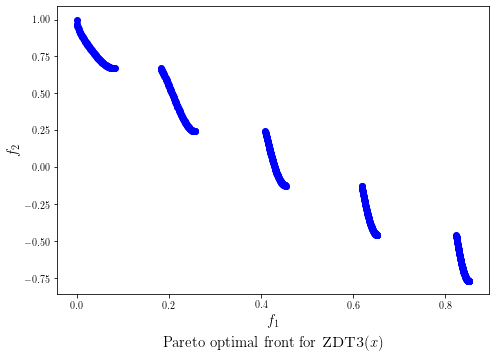

In [ ]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(pareto_front.f1, pareto_front.f2, color='b')
ax.set_xlabel(r'$f_1$', size=15)
ax.set_ylabel(r'$f_2$', size=15)
ax.set_title(r'Pareto optimal front for $\textsc{ZDT3}(x)$', size=15, y=-0.2)
plt.show()

You can also read the Pareto-optimal vectors from the file provided in Canvas, stored them in a pandas' dataframe and print its content.  

In [ ]:
# Before you run the code remember to specify a correct file path
pareto_front = pd.read_csv('/tmp/ZDT3.pf', delim_whitespace=True)
pareto_front.columns = ['f1','f2']
  
pareto_front

And again plot the Pareto-optimal objective vectors by running the following cell. As a sanity check, try running but options, automatically generated Pareto-optimal objective vectors and the ones in the file to corroborate that both shapes are the same.

In [ ]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(pareto_front.f1, pareto_front.f2, color='b')
ax.set_xlabel(r'$f_1$', size=15)
ax.set_ylabel(r'$f_2$', size=15)
ax.set_title(r'Pareto optimal front for $\textsc{ZDT3}(x)$', size=15, y=-0.2)
plt.show()

### Parameters to use
In the following section define the value of the parameters that your evolutionary strategy will use. I have added some examples of such parameters but depending on your solution you may want to add some more.

Do not change the parameter values

```
# number_runs = 50
# number_generations = 50000
```
Use these parameters to define the stopping criterion, you can use it as the maximum number of generations allowed for the algorithm to run or the maximum number of fitness evaluations allowed for the algorithm to run.

That time is enough to find an acceptable approximation of the Pareto front of the $\zdtthree$. This is to avoid extreme definition of stopping criterions, I do not want to run the algorithm from millions of generations.

Also, if you want to use another stopping criterion together with the number of generations you can do it. If your algorithm was able to find all Pareto-optimal objective vectors before all the time budget is used go ahead and stop the run.

In [182]:
# YOU CAN CHANGE THE VALUES OF THE FOLLOWING PARAMETERS AND ADD ANY OTHER PARAMETER NEEDED IN YOUR SOLUTION
population_size = 150
offspring_size = 0 # not used
mutation_prob = 0.4
crossover_prob = 0.0
problem_size =  2 # not used, fixed to 2.
lEta = 10
lowLim = 0
upLim = 1
tournamentSize = 5

# DO NOT CHANGE THE VALUE OF THE LINE BELOW.
number_runs = 50
number_generations = 50000 # you can use this one as fitness function evaluations if you want

### Evolution Strategy for $\zdtthree$
**The multiobjective problem ZDT3 is solved with the algorithm, NSGA II, explained by Deb, K. et al. [1]. The pseudo code presented in the paper in some parts it is not very clear therefore it was necessary to understand deeply the algorithm by reading the description to be able to propose a concrete solution for real coding. This is the reason the approach to implement the algorithm uses python objects which help to the storage of information for each individual. Having said that, the code is structured as follows:**
1. The individuals are objects with attributes. The attributes are id, rank, m, n, distance, sp, and value. And for the initialization a list of this objects is created with random values within the range specified for the problem.
2. The individuals are selected with tournament selection to be used for crossover, and later all the individuals are mutated.
3. The parents and offsprings are concatenated to be used for the survival method.
4. This is where the NSGA-II is used. It starts with the evaluation of the individual with the objectives functions. Then the rest of the attributes are reset to their original values. Later the fast-non-dominated-front algorthm is applied to the entire population. Next, the new population is filled based on the rank of the frontiers and the assigment of crowdwing distance is calculated as well. If the new population is not completely filled then the crowding distance is used. In this case it first performs a sort based on distance and finally the best individuals are used to complete the new population. 
5. The steps above are repeated until the numbers of runs is completed.


Note: the representation of this problem is with real numbers.


#### Initialisation
**The following code is used to create the population. The first lines of code is the class "individual" which stores all the attributes of each individual and the functions inside the class are used to update the attributes. The last function creates a list with the individuals objects. The values of the individuals depend on the problem to be solved.**

In [148]:
import random
import numpy as np

#Creates the initial population
class individual:
  def __init__(self,i):
    self.value = [random.uniform(0,1),random.uniform(0,1)]
    self.sp = []
    self.rank = 0
    self.id = i
    self.n = 0
    self.m = []
    self.distance = 0

  def add(self, x):
      self.sp.append(x)

  def sumn(self):
      self.n += 1

  def subn(self):
      self.n -= 1

#only two values per individual
def newpop(populationSize): 
  population = [None] * populationSize

  for i in range(populationSize): 
    population[i] = individual(i)
  return population

#### Stopping Criterion
**The following code is used to create the population. The first lines of code is the class "individual" which stores all the attributes of each individual and the functions inside the class are used to update the attributes. The last function creates a list with the individuals objects. The values of the individuals depend on the problem to be solved.**

#### Selection for Reproduction
**The function below is tournament selection, it selects the best individual based on the number of individuals to be compared, this number is defined by "tournament size". The individuals to be compared are selected randomly. It also uses the function "crowded_comparison_operator", which helps to determine the best individual.**

In [149]:
#Tournament Selection
# Implements the tournament selection.
def select(population, tournamentSize):
  winner = np.random.randint(0, len(population))
  #print("first",population[winner].rank,population[winner].distance )
  for i in range(tournamentSize - 1):
    rival = np.random.randint(0, len(population))
    if (crowded_comparison_operator(population[rival],population[winner])):
      winner = rival
  #print("rival",population[rival].rank,population[rival].distance )
  return population[winner]

#### Variation
**The code below are the functions for crossover and mutation. Both are used in the NSGA-II [1]. However, the methods are explained in [2]. This type of variation is used for real representation. The relevant parameters are cRate and mRate which is the threshold for them to be used. The other important parameter is lEta (lower case eta) which is used to specify the amount of variation.**

In [150]:
#Crossover**
import copy
import random

def sbx(parent1, parent2, lEta, cRate):
  offspringA = copy.deepcopy(parent1)
  offspringB = copy.deepcopy(parent2)

  if random.random() <= cRate:
    for i, (v1, v2) in enumerate(zip(offspringA.value, offspringB.value)):
        rand = random.random()
        if rand <= 0.5:
            beta = 2. * rand
        else:
            beta = 1. / (2. * (1. - rand))
        beta **= 1. / (lEta + 1.)
        offspringA.value[i] = 0.5 * (((1 + beta) * v1) + ((1 - beta) * v2))
        offspringB.value[i] = 0.5 * (((1 - beta) * v1) + ((1 + beta) * v2))

  return offspringA, offspringB

#Mutation**
def polyMutation(ind, lowLim, uppLim, lEta, mRate):
  parent = copy.deepcopy(ind)
  for i in range(len(parent.value)):
    if (random.random() <= mRate):
      u = random.random()
      delta = min((parent.value[i] - lowLim), (uppLim - parent.value[i])) / (uppLim - lowLim)
      
      if u <= 0.5:
        deltaQ = (2*u + (1-2*u)*(1-delta)**(lEta + 1))**(1/(lEta + 1))-1
      else:
        deltaQ = 1-(1*(1-u)+2*(u-0.5)*(1-delta)**(lEta+1))**(1/(lEta+1))

      parent.value[i] = parent.value[i] + deltaQ*(uppLim - lowLim)

  return parent

#### Selection for Survival

**The following cells are the core of the NSGA-II:**

+ *dominates*: this function compares individuals based on the definiton of frontiers. This is used by the fast_non_dominated_sort function.
+ *fast_non_dominated_sort*: this used to assign frontier to each of the individuals in the population. 
+ *crowding_distance_assignment*: this function assigns distance between neighbors within the same frontier.
+ *crowded_comparison_operator*: this is used to compare individuals once the distance attribute is filled. The idea is to compare the population of a frontier based on their distance.
+ *nsgaII_step*: This is where all the small chunks of code are put together in order to have the NSGA-II working. 


In [151]:
#dominates
def dominates(a,b):
  if (a[0] <= b[0]) & (a[1] <= b[1]):
    dominator = True
  else:
    dominator = False
  return dominator

In [152]:
def fast_non_dominated_sort(pop):
  P = pop.copy()

  #Fast-non-dominated-sort(P)
  F = [] # necesario?
  f1 = [] # necesario?

  for i in range(len(P)):
    Q = P.copy()
    Q.pop(i)
    for j in range(len(Q)):
      if dominates(P[i].m,Q[j].m):#should be m
        P[i].add(Q[j].id)#add to sp
      elif dominates(Q[j].m,P[i].m):#should be m
        P[i].sumn() #sum 1 to the n counter
    if P[i].n == 0:
      P[i].rank = 1
      f1.append(P[i])

  F.append(f1) # necesario?
  i = 0
  while (len(F[i]) != 0):
    Q = []
    for p in F[i]:
      for q in p.sp:
        #encuentra el n de la q -> apuntador del id en pop
        P[q].subn()
        if P[q].n == 0:
          P[q].rank = i+2
          Q.append(P[q])
    i += 1
    F.append(Q)# necesario?

  return F

In [153]:
#Crowding distance assignment (debe de ser por frontera)
#F tiene las fronteras
def crowding_distance_assignment(pop):
  P = pop.copy()

  l = len(P)
  for elem in P:
    elem.distance = 0

  #solo 2 objective functions 
  fmax = [1,6.84]
  fmin = [0,1]

  for i in range(2): #suma a la distancia las diferencias de los 2 objetivos con respecto a sus vecinos
    #print("m: ", i)
    newP = sorted(P, key=lambda x: x.m[i], reverse=False)
    newP[0].distance = float('inf')
    newP[-1].distance = float('inf')
    for j in range(1,l-1,1):
      newP[j].distance = newP[j].distance + (newP[j+1].m[i] - newP[j-1].m[i])/(fmax[i]-fmin[i])
  
  return newP

In [154]:
def crowded_comparison_operator(ind1, ind2):
  if ((ind1.rank < ind2.rank) or ((ind1.rank == ind2.rank) and (ind1.distance > ind2.distance))):
    return True
  else:
    return False

In [155]:
def nsgaII_step(old_pop,eta,cRate,lowLim,upLim,mRate,tournamentSize,fitfunction):
  #Crossover
  Q = []
  for i in range(0,len(old_pop),2):
    parent1 = select(old_pop, tournamentSize)#old_pop[i]
    parent2 = select(old_pop, tournamentSize)#old_pop[i+1]
    offspring1,offspring2 = sbx(parent1, parent2, eta, cRate)
    Q.extend((offspring1,offspring2))

  #Mutation
  for i in range(len(old_pop)):
    Q[i] = polyMutation(Q[i], lowLim, upLim, eta, mRate)

  #Joining the parents and offsprings
  R = old_pop + Q

  #Calculating the fitness and reseting values for algorithm
  for i in range(len(R)):
    R[i].m = fitfunction(R[i].value)
    R[i].id = i
    R[i].rank = 0
    R[i].n = 0
    R[i].sp = []
    R[i].distance = 0

  #Fast non-nominated sort
  Rf = fast_non_dominated_sort(R)

  Pnew = []
  #print("Pnew inicio", len(Pnew))
  for i in range(len(Rf)): 
    if (len(Pnew)+len(Rf[i]) <= len(old_pop)):
      Pnew = Pnew + crowding_distance_assignment(Rf[i])  #Crowding distance assignment
    else:
      Rc = crowding_distance_assignment(Rf[i])
      break
    
  #Sorting based on rank and distance
  Rs = sorted(Rc, key=lambda x: (x.rank, -x.distance), reverse=False) 
  #print("Pnew before crowding selection", len(Pnew))
  #Last selection
  Pnew = Pnew + Rs[0:len(old_pop)-len(Pnew)]
  #print("Pnew FINAL", len(Pnew))

  return Pnew

#### Main Cycle
In the following cell you should implement the main cycle of your evolutionary strategy, this is, putting together all elements defined previously so you can solve the problem.

Once you run the main cycle, the standard output should looks something like this
```
# <Generation/Fitness Evaluation number> <Decision vector (Genotype)> <Objective vector (Fitness functions values)>
```
Feel free to add extra spaces when needed or use any other format you think will make the output look nicer. But please preserve the order.


The following code is only a for loop that calls the NSGA-II function based on the number of runs allowed. 

In [183]:
#Main
gc = 0 # counter of generations
old_pop = newpop(population_size)
number_runs  = 20

for i in range(number_runs):
  new_pop = nsgaII_step(old_pop,lEta,crossover_prob,lowLim,upLim,mutation_prob,tournamentSize,ZDT3)    
  old_pop = new_pop
  gc += 1

The code below is used to see how the frontier is created. **It is important to hightlight that not always the code runs the best frontier is found. In most of the cases it is found but the algorithm has a stochastic component that does not allow always to find the frontier. Please, run the code around 5 times in order to see how the algorithms works.**

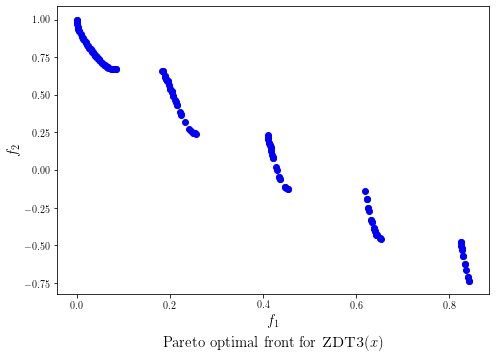

In [184]:
  f1 = []
  f2 = []
  for elem in old_pop:
    f1.append(elem.m[0])
    f2.append(elem.m[1])

  fig=plt.figure()
  ax=fig.add_axes([0,0,1,1])
  ax.scatter(f1, f2, color='b')
  ax.set_xlabel(r'$f_1$', size=15)
  ax.set_ylabel(r'$f_2$', size=15)
  #plt.ylim([0,1])
  ax.set_title(r'Pareto optimal front for $\textsc{ZDT3}(x)$', size=15, y=-0.2)
  plt.show()

The code below is used to print the population found by the algorithm.

In [ ]:
for elem in old_pop:
  print("Individual ID: {0}, Rank: {1}, Fitness Value: {2}".format(elem.id, elem.rank, elem.m))

## $\fon$

**Definition ($\fon$)**: A bi-objective test function with a nonconvex Pareto-optimal front. The function is defined as

\begin{align*}
\fon(x) &= (f_1(x),f_2(x)),\\
f_1(x) &= 1-\exp\left(-\sum_{i=1}^{3}\left(x_i-\frac{1}{\sqrt{3}}\right)^2\right),\\
f_2(x) &= 1-\exp\left(-\sum_{i=1}^{3}\left(x_i+\frac{1}{\sqrt{3}}\right)^2\right),
\end{align*}
with $-4\leq x_i\leq 4$ for $1\leq i \leq n$.

### Function Definition

In [13]:
def FON(x):
   f1 = 1 - np.exp(-sum((xi - 1/np.sqrt(3))**2 for xi in x[:3]))
   f2 = 1 - np.exp(-sum((xi + 1/np.sqrt(3))**2 for xi in x[:3]))
   return [f1, f2]

In [21]:
FON([1,0,0])

[0.5705712584731136, 0.9573488285306413]

For this problem the values for $x$, `f1` and `f2` required to plot the Pareto front are omitted. Use any means at your disposal to find them (for example make a literature review). 

The optimal values are found with this function $f_2=1-\exp(-[2-\sqrt{-\ln(1-{f_1})}]^2)$ with $0\leq f_1\leq 1- \exp(-4)$  [3].

Once you know how to generate the Pareto-optimal objective values create a pandas' dataset in the same way as the previous problems.



In [70]:
pareto_front = np.empty((0, 2))

for f1 in np.linspace(0, 1 - np.exp(-4), num=100):
    f2 = 1 - np.exp(-np.power(2 - np.sqrt(-np.log(1-f1)),2)) 
    pareto_front = np.vstack([pareto_front, [f1, f2]])  

# Convert to DataFrame and show its content
pareto_front = pd.DataFrame(pareto_front, columns=['f1', 'f2'])  
pareto_front

,f1,f2
0,0.000000,0.981684
1,0.009916,0.972966
2,0.019832,0.968378
3,0.029748,0.964388
4,0.039664,0.960670
...,...,...
95,0.942020,0.093038
96,0.951936,0.064305
97,0.961852,0.036457
98,0.971768,0.012304


Use the same code from the previous problems to plot the content of your dataset to visualise the Pareto front.

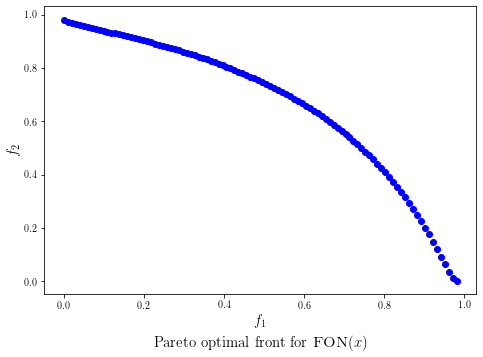

In [72]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(pareto_front.f1, pareto_front.f2, color='b')
ax.set_xlabel(r'$f_1$', size=15)
ax.set_ylabel(r'$f_2$', size=15)
ax.set_title(r'Pareto optimal front for $\textsc{FON}(x)$', size=15, y=-0.2)
plt.show()

You can check if your dataset corresponds to the Pareto front of the $\fon$ problem by comparing it with the values of the Pareto-optimal vectors from the file provided in Canvas. 

In the following the values of the file are stored in a pandas' dataframe and printed.

In [10]:
pareto_front = pd.read_csv('Fonseca.pf', delim_whitespace=True)
pareto_front.columns = ['f1','f2']
  
pareto_front

,f1,f2
0,0.000262,0.980464
1,0.000476,0.980104
2,0.000689,0.979737
3,0.000903,0.979364
4,0.001244,0.978986
...,...,...
428,0.980820,0.000177
429,0.981169,0.000091
430,0.981512,0.000005
431,0.000005,0.981512


And again plot the Pareto-optimal objective vectors by running the following cell. As a sanity check, compare your automatically generated Pareto-optimal objective vectors and the ones in the file to corroborate that both shapes are the same.

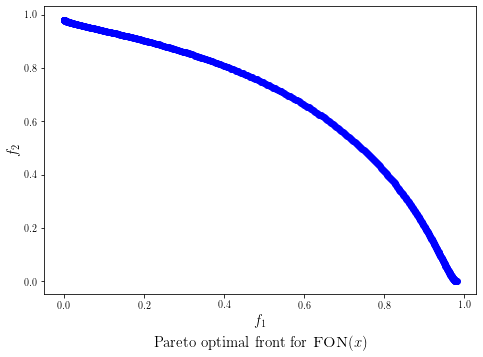

In [22]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(pareto_front.f1, pareto_front.f2, color='b')
ax.set_xlabel(r'$f_1$', size=15)
ax.set_ylabel(r'$f_2$', size=15)
ax.set_title(r'Pareto optimal front for $\textsc{FON}(x)$', size=15, y=-0.2)
plt.show()

### Parameters to use
In the following section define the value of the parameters that your evolutionary strategy will use. I have added some examples of such parameters but depending on your solution you may want to add some more.

Do not change the parameter values

```
# number_runs = 50
# number_generations = 50000
```
Use these parameters to define the stopping criterion, you can use it as the maximum number of generations allowed for the algorithm to run or the maximum number of fitness evaluations allowed for the algorithm to run.

That time is enough to find an acceptable approximation of the Pareto front of the $\fon$. This is to avoid extreme definition of stopping criterions, I do not want to run the algorithm from millions of generations.

Also, if you want to use another stopping criterion together with the number of generations you can do it. If your algorithm was able to find all Pareto-optimal objective vectors before all the time budget is used go ahead and stop the run.

In [56]:
# YOU CAN CHANGE THE VALUES OF THE FOLLOWING PARAMETERS AND ADD ANY OTHER PARAMETER NEEDED IN YOUR SOLUTION
population_size = 150
offspring_size = 0 # not used
mutation_prob = 0.1
crossover_prob = 0.4
problem_size =  3 # not used, fixed to 3.
lEta = 20
lowLim = -4
upLim = 4
tournamentSize = 5

# DO NOT CHANGE THE VALUE OF THE LINE BELOW.
number_runs = 50
number_generations = 50000 # you can use this one as fitness function evaluations if you want

### Evolution Strategy for $\fon$
**The multiobjective problem FON is solved with the algorithm, NSGA II, explained by Deb, K. et al. [1]. The pseudo code presented in the paper in some parts it is not very clear therefore it was necessary to understand deeply the algorithm by reading the description to be able to propose a concrete solution for real coding. This is the reason the approach to implement the algorithm uses python objects which help to the storage of information for each individual. Having said that, the code is structured as follows:**
1. The individuals are objects with attributes. The attributes are id, rank, m, n, distance, sp, and value. And for the initialization a list of this objects is created with random values within the range specified for the problem.
2. The individuals are selected with tournament selection to be used for crossover, and later all the individuals are mutated.
3. The parents and offsprings are concatenated to be used for the survival method.
4. This is where the NSGA-II is used. It starts with the evaluation of the individual with the objectives functions. Then the rest of the attributes are reset to their original values. Later the fast-non-dominated-front algorthm is applied to the entire population. Next, the new population is filled based on the rank of the frontiers and the assigment of crowdwing distance is calculated as well. If the new population is not completely filled then the crowding distance is used. In this case it first performs a sort based on distance and finally the best individuals are used to complete the new population. 
5. The steps above are repeated until the numbers of runs is completed.


Note: the representation of this problem is with real numbers.

#### Initialisation
**The following code is used to create the population. The first lines of code is the class "individual" which stores all the attributes of each individual and the functions inside the class are used to update the attributes. The last function creates a list with the individuals objects. The values of the individuals depend on the problem to be solved.**

In [45]:
import random
import numpy as np

#Creates the initial population
class individual:
  def __init__(self,i):
    self.value = [random.uniform(-4,4),random.uniform(-4,4),random.uniform(-4,4)] #Fixed to size 3
    self.sp = []
    self.rank = 0
    self.id = i
    self.n = 0
    self.m = []
    self.distance = 0

  def add(self, x):
      self.sp.append(x)

  def sumn(self):
      self.n += 1

  def subn(self):
      self.n -= 1

#only two values per individual
def newpop(populationSize): 
  population = [None] * populationSize

  for i in range(populationSize): 
    population[i] = individual(i)
  return population

#### Stopping Criterion
**The stop criterion used for this code is based on the number of allowed runs.**

#### Selection for Reproduction

**The function below is tournament selection, it selects the best individual based on the number of individuals to be compared, this number is defined by "tournament size". The individuals to be compared are selected randomly. It also uses the function "crowded_comparison_operator", which helps to determine the best individual.**

In [46]:
#Tournament Selection
# Implements the tournament selection.
def select(population, tournamentSize):
  winner = np.random.randint(0, len(population))
  #print("first",population[winner].rank,population[winner].distance )
  for i in range(tournamentSize - 1):
    rival = np.random.randint(0, len(population))
    if (crowded_comparison_operator(population[rival],population[winner])):
      winner = rival
  #print("rival",population[rival].rank,population[rival].distance )
  return population[winner]

#### Variation
**The code below are the functions for crossover and mutation. Both are used in the NSGA-II [1]. However, the methods are explained in [2]. This type of variation is used for real representation. The relevant parameters are cRate and mRate which is the threshold for them to be used. The other important parameter is lEta (lower case eta) which is used to specify the amount of variation.**

In [47]:
#Crossover**
import copy
import random

def sbx(parent1, parent2, lEta, cRate):
  offspringA = copy.deepcopy(parent1)
  offspringB = copy.deepcopy(parent2)

  if random.random() <= cRate:
    for i, (v1, v2) in enumerate(zip(offspringA.value, offspringB.value)):
        rand = random.random()
        if rand <= 0.5:
            beta = 2. * rand
        else:
            beta = 1. / (2. * (1. - rand))
        beta **= 1. / (lEta + 1.)
        offspringA.value[i] = 0.5 * (((1 + beta) * v1) + ((1 - beta) * v2))
        offspringB.value[i] = 0.5 * (((1 - beta) * v1) + ((1 + beta) * v2))

  return offspringA, offspringB

#Mutation**
def polyMutation(ind, lowLim, uppLim, lEta, mRate):
  parent = copy.deepcopy(ind)
  for i in range(len(parent.value)):
    if (random.random() <= mRate):
      u = random.random()
      delta = min((parent.value[i] - lowLim), (uppLim - parent.value[i])) / (uppLim - lowLim)
      
      if u <= 0.5:
        deltaQ = (2*u + (1-2*u)*(1-delta)**(lEta + 1))**(1/(lEta + 1))-1
      else:
        deltaQ = 1-(1*(1-u)+2*(u-0.5)*(1-delta)**(lEta+1))**(1/(lEta+1))

      parent.value[i] = parent.value[i] + deltaQ*(uppLim - lowLim)

  return parent

#### Selection for Survival

**The following cells are the core of the NSGA-II:**

+ *dominates*: this function compares individuals based on the definiton of frontiers. This is used by the fast_non_dominated_sort function.
+ *fast_non_dominated_sort*: this used to assign frontier to each of the individuals in the population. 
+ *crowding_distance_assignment*: this function assigns distance between neighbors within the same frontier.
+ *crowded_comparison_operator*: this is used to compare individuals once the distance attribute is filled. The idea is to compare the population of a frontier based on their distance.
+ *nsgaII_step*: This is where all the small chunks of code are put together in order to have the NSGA-II working. 

In [48]:
#dominates
def dominates(a,b):
  if (a[0] <= b[0]) & (a[1] <= b[1]):
    dominator = True
  else:
    dominator = False
  return dominator

In [49]:
def fast_non_dominated_sort(pop):
  P = pop.copy()

  #Fast-non-dominated-sort(P)
  F = [] 
  f1 = [] 

  for i in range(len(P)):
    Q = P.copy()
    Q.pop(i)
    for j in range(len(Q)):
      if dominates(P[i].m,Q[j].m):#should be m
        P[i].add(Q[j].id)#add to sp
      elif dominates(Q[j].m,P[i].m):#should be m
        P[i].sumn() #sum 1 to the n counter
    if P[i].n == 0:
      P[i].rank = 1
      f1.append(P[i])

  F.append(f1) # 
  i = 0
  while (len(F[i]) != 0):
    Q = []
    for p in F[i]:
      for q in p.sp:
        #encuentra el n de la q -> apuntador del id en pop
        P[q].subn()
        if P[q].n == 0:
          P[q].rank = i+2
          Q.append(P[q])
    i += 1
    F.append(Q)# 

  return F

In [50]:
#Crowding distance assignment (debe de ser por frontera)
#F tiene las fronteras
def crowding_distance_assignment(pop):
  P = pop.copy()

  l = len(P)
  for elem in P:
    elem.distance = 0

  #solo 2 objective functions 
  fmax = [1,1]
  fmin = [0,0]

  for i in range(2): #suma a la distancia las diferencias de los 2 objetivos con respecto a sus vecinos
    #print("m: ", i)
    newP = sorted(P, key=lambda x: x.m[i], reverse=False)
    newP[0].distance = float('inf')
    newP[-1].distance = float('inf')
    for j in range(1,l-1,1):
      newP[j].distance = newP[j].distance + (newP[j+1].m[i] - newP[j-1].m[i])/(fmax[i]-fmin[i])
  
  return newP

In [51]:
def crowded_comparison_operator(ind1, ind2):
  if ((ind1.rank < ind2.rank) or ((ind1.rank == ind2.rank) and (ind1.distance > ind2.distance))):
    return True
  else:
    return False

In [52]:
def nsgaII_step(old_pop,eta,cRate,lowLim,upLim,mRate,tournamentSize,fitfunction):
  #Crossover
  Q = []
  for i in range(0,len(old_pop),2):
    parent1 = select(old_pop, tournamentSize)#old_pop[i]
    parent2 = select(old_pop, tournamentSize)#old_pop[i+1]
    offspring1,offspring2 = sbx(parent1, parent2, eta, cRate)
    Q.extend((offspring1,offspring2))

  #Mutation
  for i in range(len(old_pop)):
    Q[i] = polyMutation(Q[i], lowLim, upLim, eta, mRate)

  #Joining the parents and offsprings
  R = old_pop + Q

  #Calculating the fitness and reseting values for algorithm
  for i in range(len(R)):
    R[i].m = fitfunction(R[i].value)
    R[i].id = i
    R[i].rank = 0
    R[i].n = 0
    R[i].sp = []
    R[i].distance = 0

  #Fast non-nominated sort
  Rf = fast_non_dominated_sort(R)

  Pnew = []
  #print("Pnew inicio", len(Pnew))
  for i in range(len(Rf)): 
    if (len(Pnew)+len(Rf[i]) <= len(old_pop)):
      Pnew = Pnew + crowding_distance_assignment(Rf[i])  #Crowding distance assignment
    else:
      Rc = crowding_distance_assignment(Rf[i])
      break
    
  #Sorting based on rank and distance
  Rs = sorted(Rc, key=lambda x: (x.rank, -x.distance), reverse=False) 
  #print("Pnew before crowding selection", len(Pnew))
  #Last selection
  Pnew = Pnew + Rs[0:len(old_pop)-len(Pnew)]
  #print("Pnew FINAL", len(Pnew))

  return Pnew

#### Main Cycle
In the following cell you should implement the main cycle of your evolutionary strategy, this is, putting together all elements defined previously so you can solve the problem.

Once you run the main cycle, the standard output should looks something like this
```
# <Generation/Fitness Evaluation number> <Decision vector (Genotype)> <Objective vector (Fitness functions values)>
```
Feel free to add extra spaces when needed or use any other format you think will make the output look nicer. But please preserve the order.

The following code is only a for loop that calls the NSGA-II function based on the number of runs allowed. 

In [57]:
#Main
gc = 0 # counter of generations
old_pop = newpop(population_size)

for i in range(number_runs):
  new_pop = nsgaII_step(old_pop,lEta,crossover_prob,lowLim,upLim,mutation_prob,tournamentSize,FON)
  old_pop = new_pop
  gc += 1


The code below is used to see how the frontier is created.

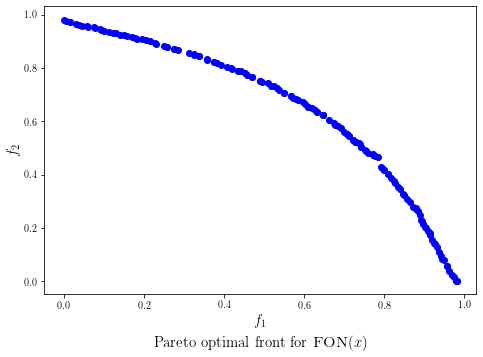

In [58]:
  f1 = []
  f2 = []
  for elem in old_pop:
    f1.append(elem.m[0])
    f2.append(elem.m[1])

  fig=plt.figure()
  ax=fig.add_axes([0,0,1,1])
  ax.scatter(f1, f2, color='b')
  ax.set_xlabel(r'$f_1$', size=15)
  ax.set_ylabel(r'$f_2$', size=15)
  #plt.ylim([0,1])
  ax.set_title(r'Pareto optimal front for $\textsc{FON}(x)$', size=15, y=-0.2)
  plt.show()

The code below is used to print the population found by the algorithm.

In [55]:
for elem in old_pop:
  print("Individual ID: {0}, Rank: {1}, Fitness Value: {2}".format(elem.id, elem.rank, elem.m))

Individual ID: 0, Rank: 1, Fitness Value: [0.982328162784182, 8.909681973578998e-05]
Individual ID: 226, Rank: 1, Fitness Value: [0.982328162784182, 8.909681973578998e-05]
Individual ID: 1, Rank: 1, Fitness Value: [1.487792936216703e-05, 0.9816421608212161]
Individual ID: 228, Rank: 1, Fitness Value: [1.487792936216703e-05, 0.9816421608212161]
Individual ID: 175, Rank: 1, Fitness Value: [0.5263843851142875, 0.7299311676441504]
Individual ID: 55, Rank: 1, Fitness Value: [0.9140924985917975, 0.17513541700423896]
Individual ID: 65, Rank: 1, Fitness Value: [0.816623469894164, 0.38656488930868316]
Individual ID: 129, Rank: 1, Fitness Value: [0.6499398391362149, 0.6234515382995583]
Individual ID: 98, Rank: 1, Fitness Value: [0.7436828309922578, 0.5015706564550507]
Individual ID: 211, Rank: 1, Fitness Value: [0.8416464869647482, 0.3408831671843051]
Individual ID: 66, Rank: 1, Fitness Value: [0.5421937109947754, 0.7130380422929324]
Individual ID: 48, Rank: 1, Fitness Value: [0.1599232469440684

## Results and Discussions

The problems were solved using the same approach (NSGA-II) with small changes in the parameters and in the range of values for the individuals. Overall the use of python objects were helpful to store all the information about each individual. The results can be listed below:

+ In most of the cases the problems are solved by the algorithm. But, still there is a small stochastic component that does not allow the algorithm to run perfectly all the times. However, in all of the problems the population is getting closer to the pareto front.
+ It was found that the parameters of mutation and crossover such as lEtha, mutation_prob and crossover_prob produce huge variations, therefore many time was spend to find the best parameters. Also, it was found that crossover produced one of the highest variations that is the reason it is not used in the first three problems.
+ There are cases where the algorithm failed to remove the extreme values, and to make the pareto front be in the range [0,1], however, as mentioned before, a small change in the parameters produce huge variations.
+ Another important point is the correctly use of fmax and fmin for the crowding distance assignment, it is not very easy to understand the meaning from the article. But a small changes produces high variations.
+ The algorithm is working fine but in some cases, such as ZDT1, the values of the parameters have a room of improvement.

Overall, the algorithm works fine but there are cases that it produces solutions far from the optimal. 

## Conclusions

The problems and approach used in this jupyter notebook were very challenging. Besides the pseudo code of the algorithm was not very easy to understand neither the finding of the right parameters, the coding of it was possible. And once one of the problems was solved, then the other were at some point easy because they only required small changes. The idea of finding the pareto front is interesting, now it is only mathematical problems, but it can be used to solve problems in other areas of study. 

## References

**If you use some method from the literature do not forget to add it here and the proper reference where needed.**

**Do not forger to remove all unnecessary material and just leave the list of references in this section.**

For example:

"*The following solutions is based on the NSGA-II defined by Deb et al. [1].*"

1. Deb, K., Pratap, A., Agarwal, S., and Meyarivan, T. (2002). A fast and elitist multiobjective genetic algorithm: NSGA-II. IEEE Transactions
on Evolutionary Computation, 6(2):182-197.
2. K. Deb and R. B. Agrawal, “Simulated binary crossover for continuous
search space,” in Complex Syst., Apr. 1995, vol. 9, pp. 115–148.
3. Ali R. Al-Roomi. (2016). Fonseca-Fleming's Problem (FON). October 22nd, 2020, de Power Sitio web: https://al-roomi.org/benchmarks/multi-objective/unconstrained-list/321-fonseca-fleming-s-function-fon 